# Doing Common stuff

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.1 MB/s 
     |████████████████████████████████| 6.3 MB 38.6 MB/s 
     |████████████████████████████████| 16.7 MB 906 kB/s 


In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import geopandas
from scipy.stats import pearsonr

In [4]:
df_1 = pd.read_csv(r'/content/gdrive/MyDrive/Colab Notebooks/Statistical_Data_Analysis/Data/NWH-CRU_pre_1901-2020_month_25km_linear.csv')
df_2 = pd.read_csv(r'/content/gdrive/MyDrive/Colab Notebooks/Statistical_Data_Analysis/Data/NWH-CRU_tmp_1901-2020_month_25km_linear.csv')

In [5]:
# Dropping 1st column
df_1 = df_1.iloc[: , 1:]
df_2 = df_2.iloc[: , 1:]

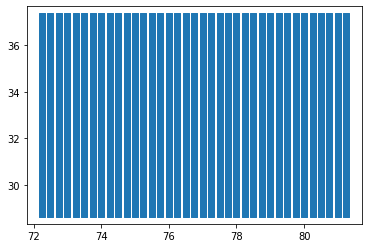

In [6]:
plt.scatter(df_1['0'],df_2['1'], marker='s')

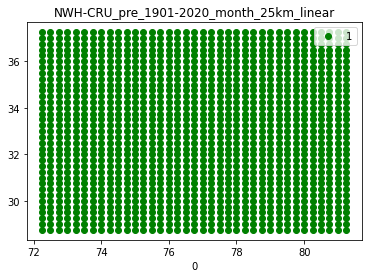

In [7]:
df_1.plot(x='0', y='1', title='NWH-CRU_pre_1901-2020_month_25km_linear',color='green', style='o')

In [8]:
df1 = pd.read_csv(r'/content/gdrive/MyDrive/Colab Notebooks/Statistical_Data_Analysis/Data/latlongNWH.csv')
df1.rename(columns = {'x':'0', 'y':'1'}, inplace = True)

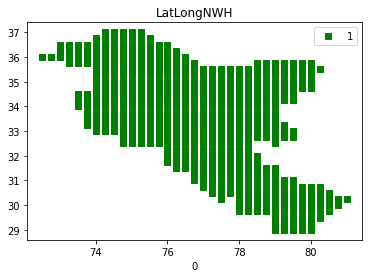

In [9]:
df1.plot(x='0', y='1', title='LatLongNWH',color='green', style='s')

In [10]:
#  Filtered 1901-2020 25km (NWH)
final_rainfall = df1.merge(df_1, on=['0','1'])
final_temperature = df1.merge(df_2, on=['0','1'])

In [11]:
final_rainfall

,0,1,2,3,4,5,6,7,8,9,...,1432,1433,1434,1435,1436,1437,1438,1439,1440,1441
0,74.75,32.5,72.85,54.15,44.30,20.25,44.20,40.95,278.85,138.60,...,109.35,43.90,21.70,82.45,151.80,360.20,83.60,0.15,22.35,27.80
1,75.00,32.5,77.25,56.50,46.80,21.10,43.30,41.85,274.10,139.50,...,109.95,44.45,22.70,84.95,146.95,349.25,84.65,0.35,23.25,27.25
2,75.25,32.5,79.90,57.65,47.00,20.65,41.00,43.10,282.15,148.60,...,104.65,42.65,21.70,89.15,146.95,361.20,86.55,0.40,24.50,26.15
3,75.50,32.5,81.55,58.65,48.10,20.65,40.85,45.00,286.00,154.50,...,103.35,42.80,22.45,91.70,148.05,359.10,89.35,0.50,25.60,25.90
4,79.00,32.5,60.70,31.20,40.65,10.00,23.20,17.15,74.35,78.40,...,52.80,53.65,30.05,8.10,24.95,19.10,2.55,0.30,2.35,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,78.50,31.0,97.45,62.75,48.90,7.05,49.00,37.50,262.25,280.95,...,79.35,60.40,52.90,70.40,163.80,143.85,31.75,3.55,5.50,6.05
525,78.75,31.0,95.90,61.90,50.60,7.80,48.25,34.90,227.20,256.60,...,82.90,65.20,54.90,56.25,131.30,110.90,19.85,2.65,3.30,4.45
526,79.00,31.0,92.90,57.50,50.15,7.35,46.05,31.10,202.70,239.25,...,82.00,66.65,54.10,46.90,110.40,94.10,15.55,2.15,2.30,3.95
527,79.25,31.0,86.60,53.65,48.70,8.05,44.50,30.95,180.65,226.40,...,80.80,66.40,54.85,38.90,92.45,78.70,10.05,1.45,1.15,2.95


# Calculating mean of Jan to Dec per year and then calculating skewness and kurtosis from 1901 to 2020

In [ ]:
parameters = pd.DataFrame(columns = ['Longitude', 'Latitude', 'rain_skewness', 'temperature_skewness', 'rain_kurtosis', 'temperature_kurtosis'])
count = 0
average_rain = np.array([])
average_temperature = np.array([])
per_year_rain = np.array([])
per_year_temperature = np.array([])
for ind in final_rainfall.index:
    year = 0
    for i in range(2,len(final_rainfall.columns)):
        count += 1
        per_year_rain = np.append(per_year_rain, final_rainfall.iloc[ind][i])
        per_year_temperature = np.append(per_year_temperature, final_temperature.iloc[ind][i])
        if count == 12:
            year += 1
            average_rain = np.append(average_rain, np.mean(per_year_rain))
            average_temperature = np.append(average_temperature, np.mean(per_year_temperature))
            per_year_rain = np.array([])
            per_year_temperature = np.array([])
            count = 0
            if year == 120:
                parameters = parameters.append({'Longitude': float(final_rainfall['0'][ind]), 'Latitude': float(final_rainfall['1'][ind]), 'rain_skewness': stats.skew(average_rain, axis=0, bias=True), 'temperature_skewness': stats.skew(average_temperature, axis=0, bias=True), 'rain_kurtosis': stats.kurtosis(average_rain, axis=0, bias=True), 'temperature_kurtosis': stats.kurtosis(average_temperature, axis=0, bias=True)}, ignore_index=True)
                average_rain = np.array([])
                average_temperature = np.array([])

In [ ]:
parameters.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Statistical_Data_Analysis/Data/skewness_kurtosis_rainfall_temperature_average_year_1901_2020.csv', index = False)

In [ ]:
parameters = pd.read_csv(r'/content/gdrive/MyDrive/Colab Notebooks/Statistical_Data_Analysis/Data/skewness_kurtosis_rainfall_temperature_average_year_1901_2020.csv')
corr, _ = pearsonr(parameters['rain_skewness'], parameters['rain_kurtosis'])
print('Correlation between skewness and kurtosis of rainfall is ', corr)
corr, _ = pearsonr(parameters['temperature_skewness'], parameters['temperature_kurtosis'])
print('Correlation between skewness and kurtosis of temperature is ', corr)

Correlation between skewness and kurtosis of rainfall is  0.8393800833221156
Correlation between skewness and kurtosis of temperature is  0.6519268218806539


In [ ]:
print(parameters[['rain_skewness', 'temperature_skewness', 'rain_kurtosis', 'temperature_kurtosis']].corr())

                      rain_skewness  temperature_skewness  rain_kurtosis  \
rain_skewness              1.000000              0.438357       0.839380   
temperature_skewness       0.438357              1.000000       0.624233   
rain_kurtosis              0.839380              0.624233       1.000000   
temperature_kurtosis      -0.069646              0.651927       0.146108   

                      temperature_kurtosis  
rain_skewness                    -0.069646  
temperature_skewness              0.651927  
rain_kurtosis                     0.146108  
temperature_kurtosis              1.000000  


Text(0.5, 1.0, 'Temperature Kurtosis spatial plot')

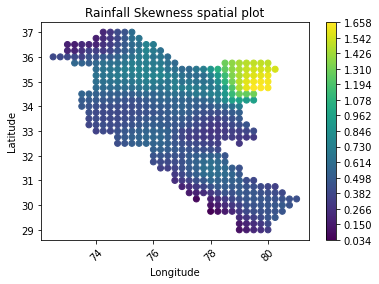

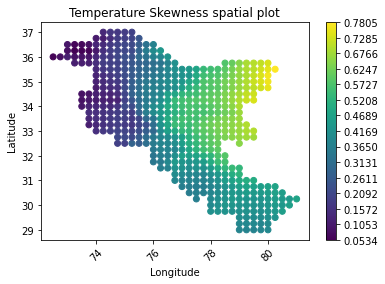

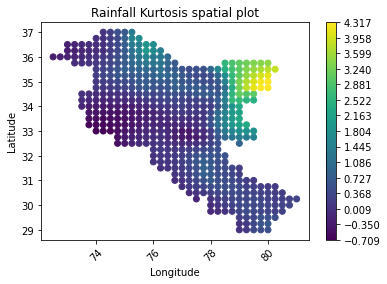

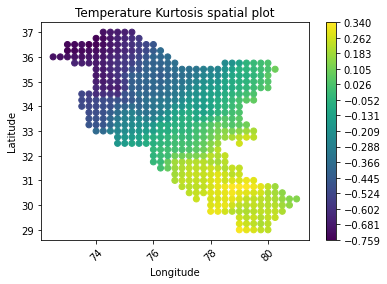

In [ ]:
plt.figure(1)
colors = parameters['rain_skewness'].astype(float)
minVal =  np.min(parameters['rain_skewness'])
maxVal =  np.max(parameters['rain_skewness'])
image = plt.scatter(parameters['Longitude'], parameters['Latitude'], c = colors, vmin=minVal,vmax = maxVal)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
v = np.linspace(minVal, maxVal, 15, endpoint=True)
#plt.show()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb = plt.colorbar(image, ticks = v)
#clb.ax.set_title('Correlation')
plt.title("Rainfall Skewness spatial plot")

plt.figure(2)
colors = parameters['temperature_skewness'].astype(float)
minVal =  np.min(parameters['temperature_skewness'])
maxVal =  np.max(parameters['temperature_skewness'])
image = plt.scatter(parameters['Longitude'], parameters['Latitude'], c = colors, vmin=minVal,vmax = maxVal)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
v = np.linspace(minVal, maxVal, 15, endpoint=True)
#plt.show()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb = plt.colorbar(image, ticks = v)
#clb.ax.set_title('Correlation')
plt.title("Temperature Skewness spatial plot")

plt.figure(3)
colors = parameters['rain_kurtosis'].astype(float)
minVal =  np.min(parameters['rain_kurtosis'])
maxVal =  np.max(parameters['rain_kurtosis'])
image = plt.scatter(parameters['Longitude'], parameters['Latitude'], c = colors, vmin=minVal,vmax = maxVal)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
v = np.linspace(minVal, maxVal, 15, endpoint=True)
#plt.show()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb = plt.colorbar(image, ticks = v)
#clb.ax.set_title('Correlation')
plt.title("Rainfall Kurtosis spatial plot")

plt.figure(4)
colors = parameters['temperature_kurtosis'].astype(float)
minVal =  np.min(parameters['temperature_kurtosis'])
maxVal =  np.max(parameters['temperature_kurtosis'])
image = plt.scatter(parameters['Longitude'], parameters['Latitude'], c = colors, vmin=minVal,vmax = maxVal)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
v = np.linspace(minVal, maxVal, 15, endpoint=True)
#plt.show()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb = plt.colorbar(image, ticks = v)
#clb.ax.set_title('Correlation')
plt.title("Temperature Kurtosis spatial plot")

In [ ]:
parameters = pd.DataFrame(columns = ['Longitude', 'Latitude', 'Correlation_rainfall_temperature'])
count = 0
average_rain = np.array([])
average_temperature = np.array([])
per_year_rain = np.array([])
per_year_temperature = np.array([])
for ind in final_rainfall.index:
    year = 0
    for i in range(2,len(final_rainfall.columns)):
        count += 1
        per_year_rain = np.append(per_year_rain, final_rainfall.iloc[ind][i])
        per_year_temperature = np.append(per_year_temperature, final_temperature.iloc[ind][i])
        if count == 12:
            year += 1
            average_rain = np.append(average_rain, np.mean(per_year_rain))
            average_temperature = np.append(average_temperature, np.mean(per_year_temperature))
            per_year_rain = np.array([])
            per_year_temperature = np.array([])
            count = 0
            if year == 120:
                corr, _ = pearsonr(average_rain, average_temperature)
                parameters = parameters.append({'Longitude': float(final_rainfall['0'][ind]), 'Latitude': float(final_rainfall['1'][ind]), 'Correlation_rainfall_temperature': corr}, ignore_index=True)
                average_rain = np.array([])
                average_temperature = np.array([])

In [ ]:
parameters.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Statistical_Data_Analysis/Data/correlation_rainfall_temperature_average_year_1901_2020.csv', index = False)

Text(0.5, 1.0, 'Correlation rainfall temperature spatial plot')

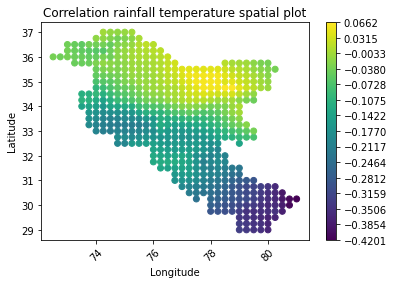

In [ ]:
colors = parameters['Correlation_rainfall_temperature'].astype(float)
minVal =  np.min(parameters['Correlation_rainfall_temperature'])
maxVal =  np.max(parameters['Correlation_rainfall_temperature'])
image = plt.scatter(parameters['Longitude'], parameters['Latitude'], c = colors, vmin=minVal,vmax = maxVal)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
v = np.linspace(minVal, maxVal, 15, endpoint=True)
#plt.show()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb = plt.colorbar(image, ticks = v)
#clb.ax.set_title('Correlation')
plt.title("Correlation rainfall temperature spatial plot")

# Calculating skewness and kurtosis for data which have every month for 1901 to 2020

In [ ]:
parameters = pd.DataFrame(columns = ['Longitude', 'Latitude', 'rain_skewness', 'temperature_skewness', 'rain_kurtosis', 'temperature_kurtosis'])
count = 0
every_month_rain = np.array([])
every_month_temperature = np.array([])
for ind in final_rainfall.index:
    for i in range(2,len(final_rainfall.columns)):
        count += 1
        every_month_rain = np.append(every_month_rain, final_rainfall.iloc[ind][i])
        every_month_temperature = np.append(every_month_temperature, final_temperature.iloc[ind][i])
        if count == 1440:
            parameters = parameters.append({'Longitude': float(final_rainfall['0'][ind]), 'Latitude': float(final_rainfall['1'][ind]), 'rain_skewness': stats.skew(every_month_rain, axis=0, bias=True), 'temperature_skewness': stats.skew(every_month_temperature, axis=0, bias=True), 'rain_kurtosis': stats.kurtosis(every_month_rain, axis=0, bias=True), 'temperature_kurtosis': stats.kurtosis(every_month_temperature, axis=0, bias=True)}, ignore_index=True)
            every_month_rain = np.array([])
            every_month_temperature = np.array([])
            count = 0

In [ ]:
parameters.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Statistical_Data_Analysis/Data/skewness_kurtosis_rainfall_temperature_every_month_1901_2020.csv', index = False)

In [ ]:
parameters = pd.read_csv(r'/content/gdrive/MyDrive/Colab Notebooks/Statistical_Data_Analysis/Data/skewness_kurtosis_rainfall_temperature_every_month_1901_2020.csv')
corr, _ = pearsonr(parameters['rain_skewness'], parameters['rain_kurtosis'])
print('Correlation between skewness and kurtosis of rainfall is ', corr)
corr, _ = pearsonr(parameters['temperature_skewness'], parameters['temperature_kurtosis'])
print('Correlation between skewness and kurtosis of temperature is ', corr)

Correlation between skewness and kurtosis of rainfall is  0.9342581150493351
Correlation between skewness and kurtosis of temperature is  -0.21126339079454162


In [ ]:
print(parameters[['rain_skewness', 'temperature_skewness', 'rain_kurtosis', 'temperature_kurtosis']].corr())

                      rain_skewness  temperature_skewness  rain_kurtosis  \
rain_skewness              1.000000              0.143571       0.934258   
temperature_skewness       0.143571              1.000000       0.398664   
rain_kurtosis              0.934258              0.398664       1.000000   
temperature_kurtosis      -0.127043             -0.211263      -0.134829   

                      temperature_kurtosis  
rain_skewness                    -0.127043  
temperature_skewness             -0.211263  
rain_kurtosis                    -0.134829  
temperature_kurtosis              1.000000  


Text(0.5, 1.0, 'Temperature Kurtosis spatial plot')

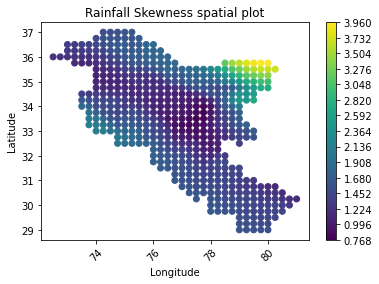

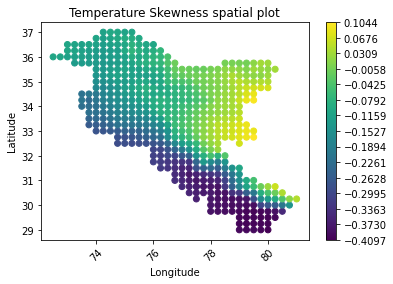

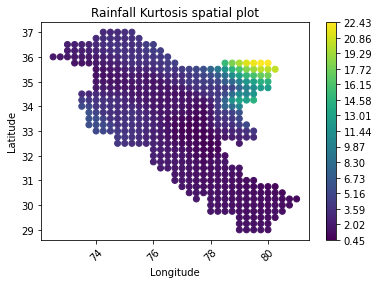

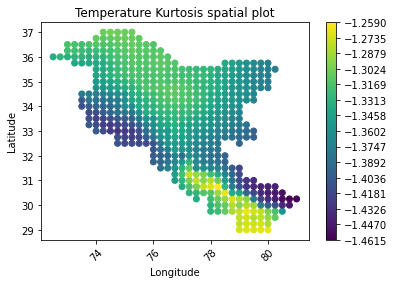

In [ ]:
plt.figure(1)
colors = parameters['rain_skewness'].astype(float)
minVal =  np.min(parameters['rain_skewness'])
maxVal =  np.max(parameters['rain_skewness'])
image = plt.scatter(parameters['Longitude'], parameters['Latitude'], c = colors, vmin=minVal,vmax = maxVal)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
v = np.linspace(minVal, maxVal, 15, endpoint=True)
#plt.show()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb = plt.colorbar(image, ticks = v)
#clb.ax.set_title('Correlation')
plt.title("Rainfall Skewness spatial plot")

plt.figure(2)
colors = parameters['temperature_skewness'].astype(float)
minVal =  np.min(parameters['temperature_skewness'])
maxVal =  np.max(parameters['temperature_skewness'])
image = plt.scatter(parameters['Longitude'], parameters['Latitude'], c = colors, vmin=minVal,vmax = maxVal)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
v = np.linspace(minVal, maxVal, 15, endpoint=True)
#plt.show()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb = plt.colorbar(image, ticks = v)
#clb.ax.set_title('Correlation')
plt.title("Temperature Skewness spatial plot")

plt.figure(3)
colors = parameters['rain_kurtosis'].astype(float)
minVal =  np.min(parameters['rain_kurtosis'])
maxVal =  np.max(parameters['rain_kurtosis'])
image = plt.scatter(parameters['Longitude'], parameters['Latitude'], c = colors, vmin=minVal,vmax = maxVal)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
v = np.linspace(minVal, maxVal, 15, endpoint=True)
#plt.show()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb = plt.colorbar(image, ticks = v)
#clb.ax.set_title('Correlation')
plt.title("Rainfall Kurtosis spatial plot")

plt.figure(4)
colors = parameters['temperature_kurtosis'].astype(float)
minVal =  np.min(parameters['temperature_kurtosis'])
maxVal =  np.max(parameters['temperature_kurtosis'])
image = plt.scatter(parameters['Longitude'], parameters['Latitude'], c = colors, vmin=minVal,vmax = maxVal)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
v = np.linspace(minVal, maxVal, 15, endpoint=True)
#plt.show()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb = plt.colorbar(image, ticks = v)
#clb.ax.set_title('Correlation')
plt.title("Temperature Kurtosis spatial plot")

In [ ]:
parameters = pd.DataFrame(columns = ['Longitude', 'Latitude', 'Correlation_rainfall_temperature'])
count = 0
average_rain = np.array([])
average_temperature = np.array([])
per_year_rain = np.array([])
per_year_temperature = np.array([])
for ind in final_rainfall.index:
    year = 0
    for i in range(2,len(final_rainfall.columns)):
        count += 1
        per_year_rain = np.append(per_year_rain, final_rainfall.iloc[ind][i])
        per_year_temperature = np.append(per_year_temperature, final_temperature.iloc[ind][i])
        if count == 12:
            year += 1
            average_rain = np.append(average_rain, np.mean(per_year_rain))
            average_temperature = np.append(average_temperature, np.mean(per_year_temperature))
            per_year_rain = np.array([])
            per_year_temperature = np.array([])
            count = 0
            if year == 120:
                corr, _ = pearsonr(average_rain, average_temperature)
                parameters = parameters.append({'Longitude': float(final_rainfall['0'][ind]), 'Latitude': float(final_rainfall['1'][ind]), 'Correlation_rainfall_temperature': corr}, ignore_index=True)
                average_rain = np.array([])
                average_temperature = np.array([])

In [ ]:
parameters.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Statistical_Data_Analysis/Data/correlation_rainfall_temperature_every_month_1901_2020.csv', index = False)

Text(0.5, 1.0, 'Correlation rainfall temperature spatial plot')

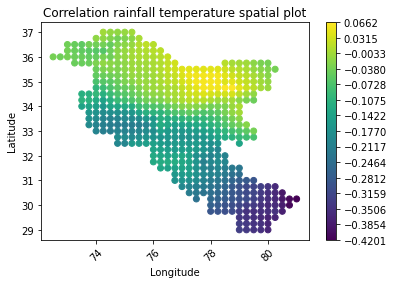

In [ ]:
colors = parameters['Correlation_rainfall_temperature'].astype(float)
minVal =  np.min(parameters['Correlation_rainfall_temperature'])
maxVal =  np.max(parameters['Correlation_rainfall_temperature'])
image = plt.scatter(parameters['Longitude'], parameters['Latitude'], c = colors, vmin=minVal,vmax = maxVal)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
v = np.linspace(minVal, maxVal, 15, endpoint=True)
#plt.show()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb = plt.colorbar(image, ticks = v)
#clb.ax.set_title('Correlation')
plt.title("Correlation rainfall temperature spatial plot")

# Calculating mean of Jan to Dec per year and then calculating skewness and kurtosis from 1901 to 1970

In [ ]:
parameters = pd.DataFrame(columns = ['Longitude', 'Latitude', 'rain_skewness', 'temperature_skewness', 'rain_kurtosis', 'temperature_kurtosis'])
count = 0
average_rain = np.array([])
average_temperature = np.array([])
per_year_rain = np.array([])
per_year_temperature = np.array([])
for ind in final_rainfall.index:
    year = 0
    for i in range(2,len(final_rainfall.columns)):
        count += 1
        per_year_rain = np.append(per_year_rain, final_rainfall.iloc[ind][i])
        per_year_temperature = np.append(per_year_temperature, final_temperature.iloc[ind][i])
        if count == 12:
            year += 1
            if year < 71:
                average_rain = np.append(average_rain, np.mean(per_year_rain))
                average_temperature = np.append(average_temperature, np.mean(per_year_temperature))
            else:
                per_year_rain = np.array([])
                per_year_temperature = np.array([])
                count = 0
                break
            per_year_rain = np.array([])
            per_year_temperature = np.array([])
            count = 0
            if year == 70:
                parameters = parameters.append({'Longitude': float(final_rainfall['0'][ind]), 'Latitude': float(final_rainfall['1'][ind]), 'rain_skewness': stats.skew(average_rain, axis=0, bias=True), 'temperature_skewness': stats.skew(average_temperature, axis=0, bias=True), 'rain_kurtosis': stats.kurtosis(average_rain, axis=0, bias=True), 'temperature_kurtosis': stats.kurtosis(average_temperature, axis=0, bias=True)}, ignore_index=True)
    average_rain = np.array([])
    average_temperature = np.array([])

In [ ]:
parameters.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Statistical_Data_Analysis/Data/skewness_kurtosis_rainfall_temperature_average_year_1901_1970.csv', index = False)

In [ ]:
parameters = pd.read_csv(r'/content/gdrive/MyDrive/Colab Notebooks/Statistical_Data_Analysis/Data/skewness_kurtosis_rainfall_temperature_average_year_1901_1970.csv')
corr, _ = pearsonr(parameters['rain_skewness'], parameters['rain_kurtosis'])
print('Correlation between skewness and kurtosis of rainfall is ', corr)
corr, _ = pearsonr(parameters['temperature_skewness'], parameters['temperature_kurtosis'])
print('Correlation between skewness and kurtosis of temperature is ', corr)

Correlation between skewness and kurtosis of rainfall is  0.8358254428715236
Correlation between skewness and kurtosis of temperature is  0.269158848444151


In [ ]:
print(parameters[['rain_skewness', 'temperature_skewness', 'rain_kurtosis', 'temperature_kurtosis']].corr())

                      rain_skewness  temperature_skewness  rain_kurtosis  \
rain_skewness              1.000000             -0.350948       0.835825   
temperature_skewness      -0.350948              1.000000      -0.404372   
rain_kurtosis              0.835825             -0.404372       1.000000   
temperature_kurtosis      -0.364684              0.269159      -0.380039   

                      temperature_kurtosis  
rain_skewness                    -0.364684  
temperature_skewness              0.269159  
rain_kurtosis                    -0.380039  
temperature_kurtosis              1.000000  


Text(0.5, 1.0, 'Temperature Kurtosis spatial plot')

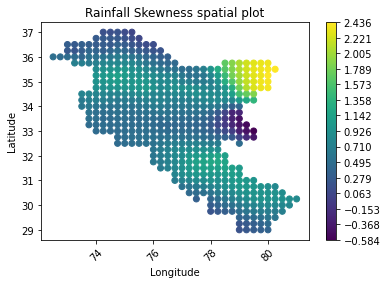

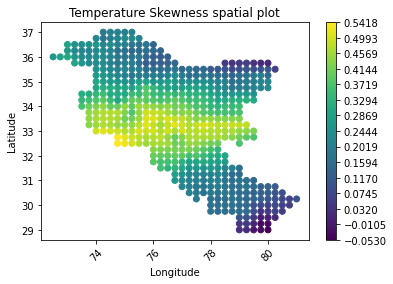

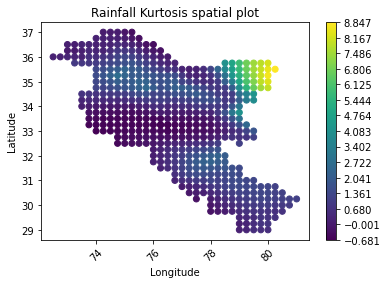

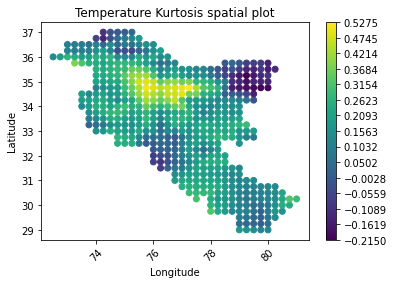

In [ ]:
plt.figure(1)
colors = parameters['rain_skewness'].astype(float)
minVal =  np.min(parameters['rain_skewness'])
maxVal =  np.max(parameters['rain_skewness'])
image = plt.scatter(parameters['Longitude'], parameters['Latitude'], c = colors, vmin=minVal,vmax = maxVal)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
v = np.linspace(minVal, maxVal, 15, endpoint=True)
#plt.show()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb = plt.colorbar(image, ticks = v)
#clb.ax.set_title('Correlation')
plt.title("Rainfall Skewness spatial plot")

plt.figure(2)
colors = parameters['temperature_skewness'].astype(float)
minVal =  np.min(parameters['temperature_skewness'])
maxVal =  np.max(parameters['temperature_skewness'])
image = plt.scatter(parameters['Longitude'], parameters['Latitude'], c = colors, vmin=minVal,vmax = maxVal)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
v = np.linspace(minVal, maxVal, 15, endpoint=True)
#plt.show()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb = plt.colorbar(image, ticks = v)
#clb.ax.set_title('Correlation')
plt.title("Temperature Skewness spatial plot")

plt.figure(3)
colors = parameters['rain_kurtosis'].astype(float)
minVal =  np.min(parameters['rain_kurtosis'])
maxVal =  np.max(parameters['rain_kurtosis'])
image = plt.scatter(parameters['Longitude'], parameters['Latitude'], c = colors, vmin=minVal,vmax = maxVal)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
v = np.linspace(minVal, maxVal, 15, endpoint=True)
#plt.show()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb = plt.colorbar(image, ticks = v)
#clb.ax.set_title('Correlation')
plt.title("Rainfall Kurtosis spatial plot")

plt.figure(4)
colors = parameters['temperature_kurtosis'].astype(float)
minVal =  np.min(parameters['temperature_kurtosis'])
maxVal =  np.max(parameters['temperature_kurtosis'])
image = plt.scatter(parameters['Longitude'], parameters['Latitude'], c = colors, vmin=minVal,vmax = maxVal)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
v = np.linspace(minVal, maxVal, 15, endpoint=True)
#plt.show()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb = plt.colorbar(image, ticks = v)
#clb.ax.set_title('Correlation')
plt.title("Temperature Kurtosis spatial plot")

In [ ]:
parameters = pd.DataFrame(columns = ['Longitude', 'Latitude', 'Correlation_rainfall_temperature'])
count = 0
average_rain = np.array([])
average_temperature = np.array([])
per_year_rain = np.array([])
per_year_temperature = np.array([])
for ind in final_rainfall.index:
    year = 0
    for i in range(2,len(final_rainfall.columns)):
        count += 1
        per_year_rain = np.append(per_year_rain, final_rainfall.iloc[ind][i])
        per_year_temperature = np.append(per_year_temperature, final_temperature.iloc[ind][i])
        if count == 12:
            year += 1
            if year < 71:
                average_rain = np.append(average_rain, np.mean(per_year_rain))
                average_temperature = np.append(average_temperature, np.mean(per_year_temperature))
            else:
                per_year_rain = np.array([])
                per_year_temperature = np.array([])
                count = 0
                break
            per_year_rain = np.array([])
            per_year_temperature = np.array([])
            count = 0
            if year == 70:
                corr, _ = pearsonr(average_rain, average_temperature)
                parameters = parameters.append({'Longitude': float(final_rainfall['0'][ind]), 'Latitude': float(final_rainfall['1'][ind]), 'Correlation_rainfall_temperature': corr}, ignore_index=True)
    average_rain = np.array([])
    average_temperature = np.array([])

In [ ]:
parameters.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Statistical_Data_Analysis/Data/correlation_rainfall_temperature_average_year_1901_1970.csv', index = False)

Text(0.5, 1.0, 'Correlation rainfall temperature spatial plot')

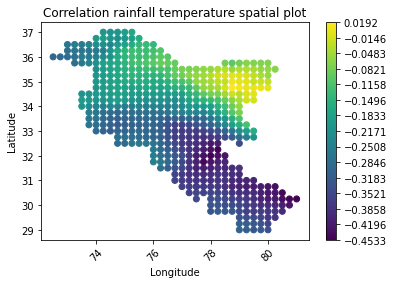

In [ ]:
colors = parameters['Correlation_rainfall_temperature'].astype(float)
minVal =  np.min(parameters['Correlation_rainfall_temperature'])
maxVal =  np.max(parameters['Correlation_rainfall_temperature'])
image = plt.scatter(parameters['Longitude'], parameters['Latitude'], c = colors, vmin=minVal,vmax = maxVal)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
v = np.linspace(minVal, maxVal, 15, endpoint=True)
#plt.show()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb = plt.colorbar(image, ticks = v)
#clb.ax.set_title('Correlation')
plt.title("Correlation rainfall temperature spatial plot")

# Calculating mean of Jan to Dec per year and then calculating skewness and kurtosis from 1971 to 2020

In [ ]:
parameters = pd.DataFrame(columns = ['Longitude', 'Latitude', 'rain_skewness', 'temperature_skewness', 'rain_kurtosis', 'temperature_kurtosis'])
count = 0
average_rain = np.array([])
average_temperature = np.array([])
per_year_rain = np.array([])
per_year_temperature = np.array([])
for ind in final_rainfall.index:
    year = 0
    for i in range(2,len(final_rainfall.columns)):
        count += 1
        per_year_rain = np.append(per_year_rain, final_rainfall.iloc[ind][i])
        per_year_temperature = np.append(per_year_temperature, final_temperature.iloc[ind][i])
        if count == 12:
            year += 1
            if year > 70:
                average_rain = np.append(average_rain, np.mean(per_year_rain))
                average_temperature = np.append(average_temperature, np.mean(per_year_temperature))
            else:
                per_year_rain = np.array([])
                per_year_temperature = np.array([])
                count = 0
                continue
            per_year_rain = np.array([])
            per_year_temperature = np.array([])
            count = 0
            if year == 120:
                parameters = parameters.append({'Longitude': float(final_rainfall['0'][ind]), 'Latitude': float(final_rainfall['1'][ind]), 'rain_skewness': stats.skew(average_rain, axis=0, bias=True), 'temperature_skewness': stats.skew(average_temperature, axis=0, bias=True), 'rain_kurtosis': stats.kurtosis(average_rain, axis=0, bias=True), 'temperature_kurtosis': stats.kurtosis(average_temperature, axis=0, bias=True)}, ignore_index=True)
                average_rain = np.array([])
                average_temperature = np.array([])

In [ ]:
parameters.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Statistical_Data_Analysis/Data/skewness_kurtosis_rainfall_temperature_average_year_1971_2020.csv', index = False)

In [ ]:
parameters = pd.read_csv(r'/content/gdrive/MyDrive/Colab Notebooks/Statistical_Data_Analysis/Data/skewness_kurtosis_rainfall_temperature_average_year_1971_2020.csv')
corr, _ = pearsonr(parameters['rain_skewness'], parameters['rain_kurtosis'])
print('Correlation between skewness and kurtosis of rainfall is ', corr)
corr, _ = pearsonr(parameters['temperature_skewness'], parameters['temperature_kurtosis'])
print('Correlation between skewness and kurtosis of temperature is ', corr)

Correlation between skewness and kurtosis of rainfall is  0.7773159200949964
Correlation between skewness and kurtosis of temperature is  0.46489106659571366


In [ ]:
print(parameters[['rain_skewness', 'temperature_skewness', 'rain_kurtosis', 'temperature_kurtosis']].corr())

                      rain_skewness  temperature_skewness  rain_kurtosis  \
rain_skewness              1.000000             -0.013370       0.777316   
temperature_skewness      -0.013370              1.000000       0.140448   
rain_kurtosis              0.777316              0.140448       1.000000   
temperature_kurtosis      -0.688086              0.464891      -0.567074   

                      temperature_kurtosis  
rain_skewness                    -0.688086  
temperature_skewness              0.464891  
rain_kurtosis                    -0.567074  
temperature_kurtosis              1.000000  


Text(0.5, 1.0, 'Temperature Kurtosis spatial plot')

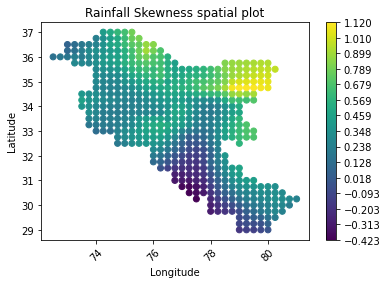

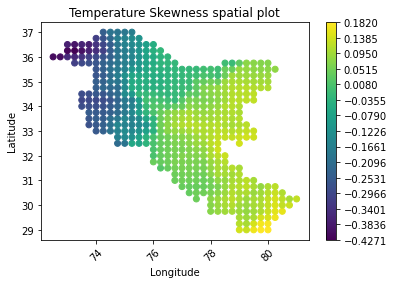

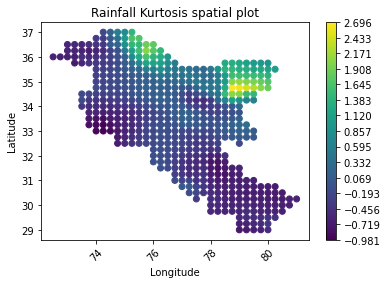

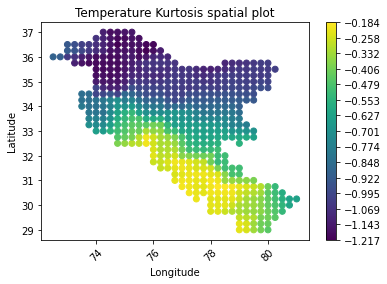

In [ ]:
plt.figure(1)
colors = parameters['rain_skewness'].astype(float)
minVal =  np.min(parameters['rain_skewness'])
maxVal =  np.max(parameters['rain_skewness'])
image = plt.scatter(parameters['Longitude'], parameters['Latitude'], c = colors, vmin=minVal,vmax = maxVal)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
v = np.linspace(minVal, maxVal, 15, endpoint=True)
#plt.show()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb = plt.colorbar(image, ticks = v)
#clb.ax.set_title('Correlation')
plt.title("Rainfall Skewness spatial plot")

plt.figure(2)
colors = parameters['temperature_skewness'].astype(float)
minVal =  np.min(parameters['temperature_skewness'])
maxVal =  np.max(parameters['temperature_skewness'])
image = plt.scatter(parameters['Longitude'], parameters['Latitude'], c = colors, vmin=minVal,vmax = maxVal)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
v = np.linspace(minVal, maxVal, 15, endpoint=True)
#plt.show()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb = plt.colorbar(image, ticks = v)
#clb.ax.set_title('Correlation')
plt.title("Temperature Skewness spatial plot")

plt.figure(3)
colors = parameters['rain_kurtosis'].astype(float)
minVal =  np.min(parameters['rain_kurtosis'])
maxVal =  np.max(parameters['rain_kurtosis'])
image = plt.scatter(parameters['Longitude'], parameters['Latitude'], c = colors, vmin=minVal,vmax = maxVal)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
v = np.linspace(minVal, maxVal, 15, endpoint=True)
#plt.show()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb = plt.colorbar(image, ticks = v)
#clb.ax.set_title('Correlation')
plt.title("Rainfall Kurtosis spatial plot")

plt.figure(4)
colors = parameters['temperature_kurtosis'].astype(float)
minVal =  np.min(parameters['temperature_kurtosis'])
maxVal =  np.max(parameters['temperature_kurtosis'])
image = plt.scatter(parameters['Longitude'], parameters['Latitude'], c = colors, vmin=minVal,vmax = maxVal)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
v = np.linspace(minVal, maxVal, 15, endpoint=True)
#plt.show()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb = plt.colorbar(image, ticks = v)
#clb.ax.set_title('Correlation')
plt.title("Temperature Kurtosis spatial plot")

In [ ]:
parameters = pd.DataFrame(columns = ['Longitude', 'Latitude', 'Correlation_rainfall_temperature'])
count = 0
average_rain = np.array([])
average_temperature = np.array([])
per_year_rain = np.array([])
per_year_temperature = np.array([])
for ind in final_rainfall.index:
    year = 0
    for i in range(2,len(final_rainfall.columns)):
        count += 1
        per_year_rain = np.append(per_year_rain, final_rainfall.iloc[ind][i])
        per_year_temperature = np.append(per_year_temperature, final_temperature.iloc[ind][i])
        if count == 12:
            year += 1
            if year > 70:
                average_rain = np.append(average_rain, np.mean(per_year_rain))
                average_temperature = np.append(average_temperature, np.mean(per_year_temperature))
            else:
                per_year_rain = np.array([])
                per_year_temperature = np.array([])
                count = 0
                continue
            per_year_rain = np.array([])
            per_year_temperature = np.array([])
            count = 0
            if year == 120:
                corr, _ = pearsonr(average_rain, average_temperature)
                parameters = parameters.append({'Longitude': float(final_rainfall['0'][ind]), 'Latitude': float(final_rainfall['1'][ind]), 'Correlation_rainfall_temperature': corr}, ignore_index=True)
                average_rain = np.array([])
                average_temperature = np.array([])

In [ ]:
parameters.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Statistical_Data_Analysis/Data/correlation_rainfall_temperature_average_year_1971_2020.csv', index = False)

Text(0.5, 1.0, 'Correlation rainfall temperature spatial plot')

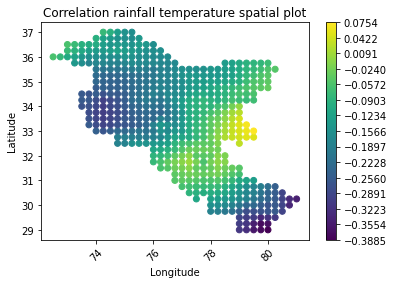

In [ ]:
colors = parameters['Correlation_rainfall_temperature'].astype(float)
minVal =  np.min(parameters['Correlation_rainfall_temperature'])
maxVal =  np.max(parameters['Correlation_rainfall_temperature'])
image = plt.scatter(parameters['Longitude'], parameters['Latitude'], c = colors, vmin=minVal,vmax = maxVal)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees
v = np.linspace(minVal, maxVal, 15, endpoint=True)
#plt.show()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb = plt.colorbar(image, ticks = v)
#clb.ax.set_title('Correlation')
plt.title("Correlation rainfall temperature spatial plot")

# Plotting NWH shape file

Text(105.42474628448971, 0.5, 'Latitude')

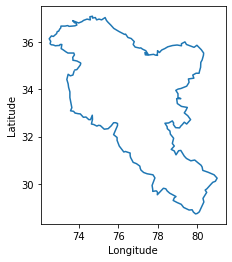

In [ ]:
NWH = geopandas.read_file("/content/gdrive/MyDrive/Colab Notebooks/Statistical_Data_Analysis/Data/4_17_2018_899072.shp")
NWH.plot()
plt.xlabel("Longitude")
plt.ylabel("Latitude")